<a href="https://colab.research.google.com/github/Maulana2798/identifikasi/blob/main/prediksi_koa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#memasitikan versi tensorflow
print(tf.__version__)

2.9.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#melakukan extract file zip
import zipfile,os
local_zip = '/content/drive/MyDrive/Skripsi/Program/koa_baru.zip'
base_dir = '/content/koa/koa-val-image'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [4]:
#mendefinisikan nama direktori untuk data latih dan data validasi
train_dir = os.path.join(base_dir, 'koa')
validation_dir = os.path.join(base_dir, 'koa/koa-val-image')

In [5]:
#cek direktori data train
os.listdir('/content/koa')

['sisiak_bendera',
 'pacah_aluih',
 'tali_merah',
 'hiu_hitam',
 'hiu_bungo',
 'bengkok_hitam',
 'tali_aluih',
 'babi_aluih',
 'batuang_manih',
 'jarum_aluih',
 'jarum_hitam',
 'batuang_anam',
 'suduang_hitam',
 'jarum_gadang',
 'suduang_aluih',
 'bengkok_aluih',
 'hiu_babak',
 'pacah_delapan',
 'sisiak_aluih',
 'sisiak_gadang',
 'hiu_kuciang',
 'batuang_aluih',
 'bengkok_gadang',
 'babi_gadang',
 'pacah_manih',
 'suduang_pinggang',
 'hiu_pinci',
 'koa-val-image',
 'hiu_gadang',
 'babi_pusek',
 'tali_bulek']

In [6]:
#cek direktori data valiadtion
os.listdir('/content/koa/koa-val-image')

['sisiak_bendera',
 'pacah_aluih',
 'tali_merah',
 'hiu_hitam',
 'hiu_bungo',
 'bengkok_hitam',
 'tali_aluih',
 'babi_aluih',
 'batuang_manih',
 'jarum_aluih',
 'jarum_hitam',
 'batuang_anam',
 'suduang_hitam',
 'jarum_gadang',
 'suduang_aluih',
 'bengkok_aluih',
 'hiu_babak',
 'pacah_delapan',
 'sisiak_aluih',
 'sisiak_gadang',
 'hiu_kuciang',
 'batuang_aluih',
 'bengkok_gadang',
 'babi_gadang',
 'pacah_manih',
 'suduang_pinggang',
 'hiu_pinci',
 'hiu_gadang',
 'babi_pusek',
 'tali_bulek']

In [7]:
#membuat direktori koa pada data training
train_babi_aluih_dir = os.path.join(train_dir, 'babi_aluih')
train_babi_gadang_dir = os.path.join(train_dir, 'babi_gadang')
train_babi_pusek_dir = os.path.join(train_dir, 'babi_pusek')
train_batuang_aluih_dir = os.path.join(train_dir, 'batuang_aluih')
train_batuang_anam_dir = os.path.join(train_dir, 'batuang_anam')
train_batuang_manih_dir = os.path.join(train_dir, 'batuang_manih')
train_bengkok_aluih_dir = os.path.join(train_dir, 'bengkok_aluih')
train_bengkok_gadang_dir = os.path.join(train_dir, 'bengkok_gadang')
train_bengkok_hitam_dir = os.path.join(train_dir, 'bengkok_hitam')
train_hiu_babak_dir = os.path.join(train_dir, 'hiu_babak')
train_hiu_bungo_dir = os.path.join(train_dir, 'hiu_bungo')
train_hiu_gadang_dir = os.path.join(train_dir, 'hiu_gadang')
train_hiu_hitam_dir = os.path.join(train_dir, 'hiu_hitam')
train_hiu_kuciang_dir = os.path.join(train_dir, 'hiu_kuciang')
train_hiu__pinci_dir = os.path.join(train_dir, 'hiu_pinci')
train_jarum_aluih_dir = os.path.join(train_dir, 'jarum_aluih')
train_jarum_gadang_dir = os.path.join(train_dir, 'jarum_gadang')
train_jarum_hitam_dir = os.path.join(train_dir, 'jarum_hitam')
train_pacah_aluih_dir = os.path.join(train_dir, 'pacah_aluih')
train_pacah_delapan_dir = os.path.join(train_dir, 'pacah_delapan')
train_pacah_manih_dir = os.path.join(train_dir, 'pacah_manih')
train_sisiak_aluih_dir = os.path.join(train_dir, 'sisiak_aluih')
train_sisiak_bendera_dir = os.path.join(train_dir, 'sisiak_bendera')
train_sisiak_gadang_dir = os.path.join(train_dir, 'sisiak_gadang')
train_suduang_aluih_dir = os.path.join(train_dir, 'suduang_aluih')
train_suduang_hitam_dir = os.path.join(train_dir, 'suduang_hitam')
train_suduang_pinggang_dir = os.path.join(train_dir, 'suduang_pinggang')
train_tali_aluih_dir = os.path.join(train_dir, 'tali_aluih')
train_tali_bulek_dir = os.path.join(train_dir, 'tali_bulek')
train_tali_merah_dir = os.path.join(train_dir, 'tali_merah')

#membuat direktori koa pada data c=validasi
validation_babi_aluih_dir = os.path.join(validation_dir, 'babi_aluih')
validation_babi_gadang_dir = os.path.join(validation_dir, 'babi_gadang')
validation_babi_pusek_dir = os.path.join(validation_dir, 'babi_pusek')
validation_batuang_aluih_dir = os.path.join(validation_dir, 'batuang_aluih')
validation_batuang_anam_dir = os.path.join(validation_dir, 'batuang_anam')
validation_batuang_manih_dir = os.path.join(validation_dir, 'batuang_manih')
validation_bengkok_aluih_dir = os.path.join(validation_dir, 'bengkok_aluih')
validation_bengkok_gadang_dir = os.path.join(validation_dir, 'bengkok_gadang')
validation_bengkok_hitam_dir = os.path.join(validation_dir, 'bengkok_hitam')
validation_hiu_babak_dir = os.path.join(validation_dir, 'hiu_babak')
validation_hiu_bungo_dir = os.path.join(validation_dir, 'hiu_bungo')
validation_hiu_gadang_dir = os.path.join(validation_dir, 'hiu_gadang')
validation_hiu_hitam_dir = os.path.join(validation_dir, 'hiu_hitam')
validation_hiu_kuciang_dir = os.path.join(validation_dir, 'hiu_kuciang')
validation_hiu__pinci_dir = os.path.join(validation_dir, 'hiu_pinci')
validation_jarum_aluih_dir = os.path.join(validation_dir, 'jarum_aluih')
validation_jarum_gadang_dir = os.path.join(validation_dir, 'jarum_gadang')
validation_jarum_hitam_dir = os.path.join(validation_dir, 'jarum_hitam')
validation_pacah_aluih_dir = os.path.join(validation_dir, 'pacah_aluih')
validation_pacah_delapan_dir = os.path.join(validation_dir, 'pacah_delapan')
validation_pacah_manih_dir = os.path.join(validation_dir, 'pacah_manih')
validation_sisiak_aluih_dir = os.path.join(validation_dir, 'sisiak_aluih')
validation_sisiak_bendera_dir = os.path.join(validation_dir, 'sisiak_bendera')
validation_sisiak_gadang_dir = os.path.join(validation_dir, 'sisiak_gadang')
validation_suduang_aluih_dir = os.path.join(validation_dir, 'suduang_aluih')
validation_suduang_hitam_dir = os.path.join(validation_dir, 'suduang_hitam')
validation_suduang_pinggang_dir = os.path.join(validation_dir, 'suduang_pinggang')
validation_tali_aluih_dir = os.path.join(validation_dir, 'tali_aluih')
validation_tali_bulek_dir = os.path.join(validation_dir, 'tali_bulek')
validation_tali_merah_dir = os.path.join(validation_dir, 'tali_merah')

In [8]:
#membuat image augmantation untuk data training
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2 #ukuran validation 20%
)

In [9]:
#mempersiapkan data latih yang akan dipelajari model
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size = (200, 100),
        subset = 'training',
        class_mode = 'categorical',
)

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size = (200, 100),
        subset = 'validation',
        class_mode = 'categorical',
)

Found 4080 images belonging to 30 classes.
Found 1020 images belonging to 30 classes.


In [10]:
#membangun model sequential
from tensorflow.keras.optimizers import  RMSprop
from tensorflow.keras.models import  Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dense, Dropout

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 100, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(30, activation='softmax')
])  

In [11]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'

model.compile(
         loss ='categorical_crossentropy',
         optimizer = tf.optimizers.Adam(),
         metrics = ['accuracy']
)

In [12]:
#ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 98, 16)       448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 10, 64)       0

In [13]:
#callback untuk stop training jika akurasi telah dicapai
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = None):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
      print('\nIn Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'Training stop.')
      print('\nIn Epoch', epoch, '\nVal Accuracy has reach = %2.2f%%' %(logs['val_accuracy']*100), 'Training stop.')
      self.model.stop_training = True
callbacks = Callback()

In [14]:
#latih model
history = model.fit(
      train_generator,
      batch_size=16,
      steps_per_epoch=10, 
      epochs=50,
      validation_data=validation_generator,
      verbose=2,
      shuffle=False,
      callbacks = [Callback()]
)

Epoch 1/50
10/10 - 21s - loss: 3.4172 - accuracy: 0.0406 - val_loss: 3.3992 - val_accuracy: 0.0647 - 21s/epoch - 2s/step
Epoch 2/50
10/10 - 19s - loss: 3.3963 - accuracy: 0.0344 - val_loss: 3.3746 - val_accuracy: 0.0657 - 19s/epoch - 2s/step
Epoch 3/50
10/10 - 19s - loss: 3.3719 - accuracy: 0.0406 - val_loss: 3.2382 - val_accuracy: 0.0667 - 19s/epoch - 2s/step
Epoch 4/50
10/10 - 18s - loss: 3.1310 - accuracy: 0.1125 - val_loss: 3.1440 - val_accuracy: 0.0941 - 18s/epoch - 2s/step
Epoch 5/50
10/10 - 19s - loss: 3.1164 - accuracy: 0.1125 - val_loss: 3.1473 - val_accuracy: 0.0735 - 19s/epoch - 2s/step
Epoch 6/50
10/10 - 18s - loss: 3.1904 - accuracy: 0.0969 - val_loss: 3.0967 - val_accuracy: 0.0961 - 18s/epoch - 2s/step
Epoch 7/50
10/10 - 19s - loss: 3.1055 - accuracy: 0.0812 - val_loss: 3.0762 - val_accuracy: 0.0971 - 19s/epoch - 2s/step
Epoch 8/50
10/10 - 18s - loss: 2.9690 - accuracy: 0.1312 - val_loss: 3.0368 - val_accuracy: 0.1333 - 18s/epoch - 2s/step
Epoch 9/50
10/10 - 21s - loss: 3

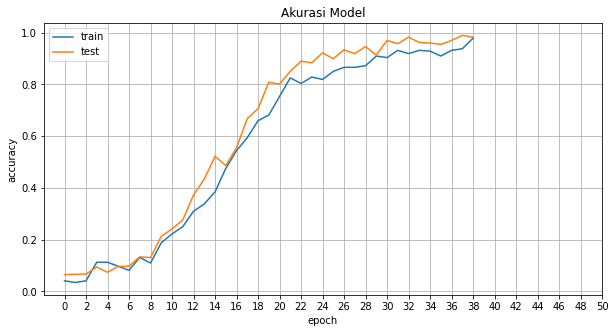

In [15]:
#plot akurasi
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title('Akurasi Model')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50])
plt.grid(True)
plt.show()

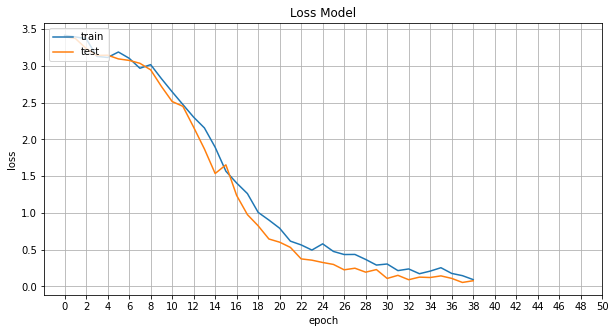

In [16]:
#plot loss
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Loss Model')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50])
plt.grid(True)
plt.show()

Saving babi_aluih.jpg to babi_aluih.jpg
1/1 [==============================] - 0s 169ms/step
babi_aluih.jpg
babi_aluih


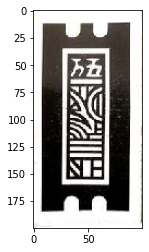

In [17]:
#Output prediksi dari model 

import tensorflow.keras
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
  #memprediksi
  path = fn
  gambar = image.load_img(path, target_size=(200,100))
  imgplot = plt.imshow(gambar)
  x = image.img_to_array(gambar)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=16)
  
  print(fn)
  if classes[0, 0] == 1:
    print("babi_aluih")
  elif classes[0, 1] == 1:
    print("babi_gadang")
  elif classes[0, 2] == 1:
    print("babi_pusek")
  elif classes[0, 3] == 1:
    print("batuang_aluih")
  elif classes[0, 4] == 1:
    print("batuang_anam")
  elif classes[0, 5] == 1:
    print("batuang_manih")
  elif classes[0, 6] == 1:
    print("bengkok_aluih")
  elif classes[0, 7] == 1:
    print("bengkok_gadang")
  elif classes[0, 8] == 1:
    print("bengkok_hitam")
  elif classes[0, 9] == 1:
    print("hiu_babak")
  elif classes[0, 10] == 1:
    print("hiu_bungo")
  elif classes[0, 11] == 1:
    print("hiu_gadang")
  elif classes[0, 12] == 1:
    print("hiu_hitam")
  elif classes[0, 13] == 1:
    print("hiu_kuciang")
  elif classes[0, 14] == 1:
    print("hiu_pinci")
  elif classes[0, 15] == 1:
    print("jarum_aluih")
  elif classes[0, 16] == 1:
    print("jarum_gadang")
  elif classes[0, 17] == 1:
    print("jarum_hitam")
  elif classes[0, 18] == 1:
    print("pacah_aluih")
  elif classes[0, 19] == 1:
    print("pacah_delapan")
  elif classes[0, 20] == 1:
    print("pacah_manih")
  elif classes[0, 21] == 1:
    print("sisiak_aluih")
  elif classes[0, 22] == 1:
    print("sisiak_bendera")
  elif classes[0, 23] == 1:
    print("sisiak_gadang")
  elif classes[0, 24] == 1:
    print("suduang_aluih")
  elif classes[0, 25] == 1:
    print("suduang_hitam")
  elif classes[0, 26] == 1:
    print("suduang_pinggang")
  elif classes[0, 27] == 1:
    print("tali_aluih")
  elif classes[0, 28] == 1:
    print("tali_bulek")
  elif classes[0, 29] == 1:
    print("tali_merah")
  else:
    print("no matching data")

In [18]:
#melakukan extract file zip
import zipfile,os
local_zip = '/content/drive/MyDrive/Skripsi/Program/test.zip'
base_dir = '/content/test'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(base_dir, target_size=(200, 100), batch_size=32, shuffle=False)

#Confution Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

Found 90 images belonging to 30 classes.
3/3 [==============================] - 1s 171ms/step
Confusion Matrix
[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0

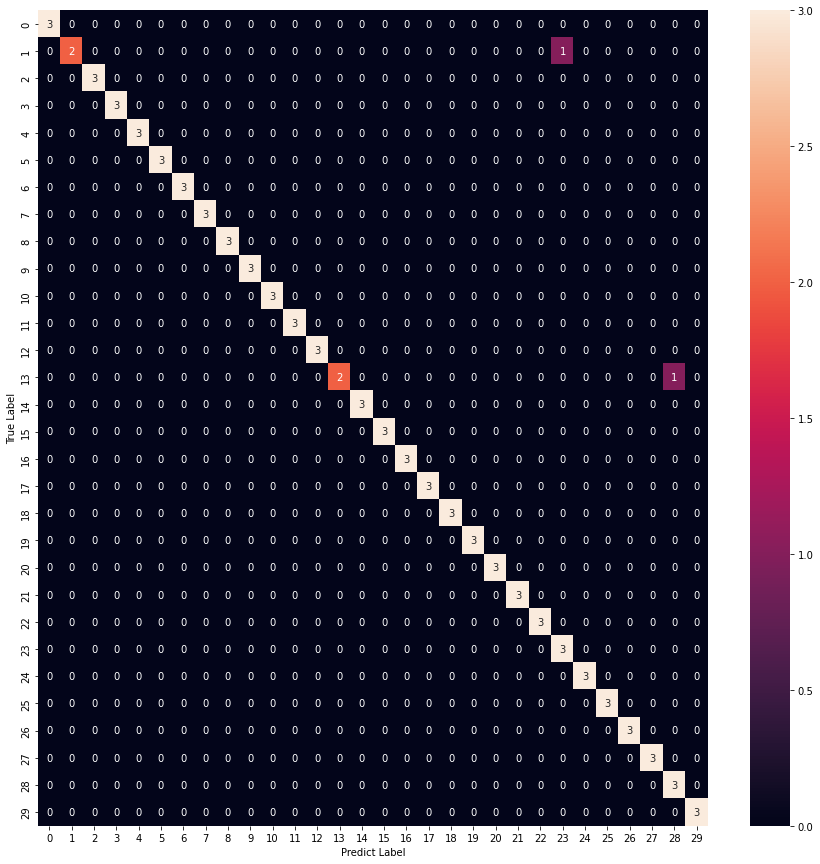

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(confusion_matrix(test_generator.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show()

In [26]:
print('\n Classification Report')
target_names = ['babi_aluih',
 'babi_gadang',
 'babi_pusek',
 'batuang_aluih',
 'batuang_anam',
 'batuang_manih',
 'bengkok_aluih',
 'bengkok_gadang',
 'bengkok_hitam',
 'hiu_babak',
 'hiu_bungo',
 'hiu_gadang',
 'hiu_hitam',
 'hiu_kuciang',
 'hiu_pinci',
 'jarum_aluih',
 'jarum_gadang',
 'jarum_hitam',
 'suduang_aluih',
 'suduang_hitam',
 'suduang_pinggang',
 'pacah_aluih',
 'pacah_delapan',
 'pacah_manih',
 'sisiak_aluih',
 'sisiak_gadang',
 'sisiak_bendera',
 'tali_aluih',
 'tali_bulek',
 'tali_merah']

print(classification_report(test_generator.classes, y_pred, target_names=target_names))


 Classification Report
                  precision    recall  f1-score   support

      babi_aluih       1.00      1.00      1.00         3
     babi_gadang       1.00      0.67      0.80         3
      babi_pusek       1.00      1.00      1.00         3
   batuang_aluih       1.00      1.00      1.00         3
    batuang_anam       1.00      1.00      1.00         3
   batuang_manih       1.00      1.00      1.00         3
   bengkok_aluih       1.00      1.00      1.00         3
  bengkok_gadang       1.00      1.00      1.00         3
   bengkok_hitam       1.00      1.00      1.00         3
       hiu_babak       1.00      1.00      1.00         3
       hiu_bungo       1.00      1.00      1.00         3
      hiu_gadang       1.00      1.00      1.00         3
       hiu_hitam       1.00      1.00      1.00         3
     hiu_kuciang       1.00      0.67      0.80         3
       hiu_pinci       1.00      1.00      1.00         3
     jarum_aluih       1.00      1.00      1.00